In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
def show_random_samples(dataset, num_samples=5):

    class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
        ]


    
    indices = random.sample(range(len(dataset)), num_samples) 

    plt.figure(figsize=(10, 5))
    
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image = image.squeeze(0)                # Remove the channel dimension (C, H, W -> H, W)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{class_names[label]}")

    plt.tight_layout()
    
    plt.show()

---

**TÄVLING! Sifferklassificering med Fully Connected Neural Networks**

Välkommen till dagens tävling! Vi ska arbeta med det kända MNIST-datasetet, och försöka bygga en så bra classificationmodell som möjligt.

---

**Ladda ner data**

Notera att vi här kan ladda ner MNIST datasetet direkt, och att vi i den nedladdningen definiera olika transformationer på vår data. Detta är väldigt behjälpligt när vi jobbat med bilddata.
Vi kan exempelvis ändra om datatypen typp tensorer direkt, och även normalisera datan. 

Nedan anger vi två värden (en för varje axel, vi jobbar med 2d bilder här) till normalize, 0.5 i båda fallen - och vi kommer således att normalisera datan till att anta värden som följer en normalfördelning med medelvärde 0.5.  

Läs mer om tranformations i Pytorch [här](https://pytorch.org/vision/stable/transforms.html).

In [3]:
# Normalization transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load training and test datasets with normalization
trainset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)


100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




9.6%

100.0%
100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



*Uppgift 1.1*

Undersök vad som nu finns i trainset. Does it make sense?

Till din hjälp kan du använda använda funktionen *show_random_samples* definierad ovan.

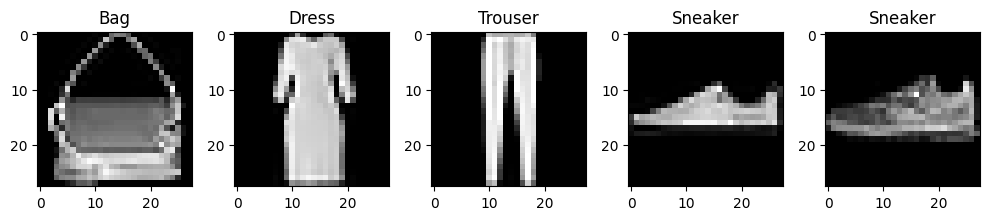

In [4]:
# TODO: work it out

show_random_samples(trainset, num_samples=5)

*Uppgift 1.2*

Vilken storlek/shape har varje training sample? Vad händer om du använder metoden .flatten() på en training sample?

Tips, kolla upp ex. trainset[0]. Vad innehåller den?

In [14]:
# TODO: work it out
print(trainset[0][1])
print(trainset[0][0].shape)
print(trainset[0][0].flatten().shape)


9
torch.Size([1, 28, 28])
torch.Size([784])


Dataloaders skapar vi nedan. Notera att vi väljer batch_size här.

In [15]:
BATCH_SIZE = 32

# Dataloaders
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

---

**Nätverk**

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(self, input_size, output_size).__init__()
        self.flatten = nn.Flatten()
        self.linear(input_size, 128)

        # TODO: Implement rest of layers and activations

    def forward(self, x):
        x = self.flatten(x)
        
        # TODO: implement forward propagation, note that flatten must be the first action (why?)

        return x

---

**Train and eval loop**



- Sätt upp en träningsloop i PyTorch. Bestäm modell arkitektur själv samt regularisering, dropout etc.

- Iterera! Den som får bästa och stabilaste resultatet vinner priset!!

Glöm inte att även spara train- och testloss (likt hur vi gjort tidigare) så att ni kan plotta kurvorna!

In [ ]:
EPOCHS = 
LEARNING_RATE = 
INPUT_SIZE = 
input_size =
output_size = 

model = NeuralNetwork(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss() # our new loss, for multiclass classification
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)


for epoch in range(EPOCHS):
    
    model.train()

    for images, labels in trainloader:
        
        images, labels = images.to(device), labels.to(device)   # lägger över träningsdata till device (gpu om tillgänglig) innan leverans till modellen

    # TODO work work work

In [18]:

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

In [17]:
import torch.nn.functional as F
from torch.optim import SGD, Adam, Adadelta
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
from torch.optim.lr_scheduler import StepLR
import seaborn as sns
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, input_size, output_size, device, batch_size=16, learning_rate=0.001, verbose=True, l2_lambda=0.0):
        self.input_size = input_size
        self.output_size = output_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model
        self.model = Net(input_size, output_size).to(device)

        # loss function based on output size
        if output_size == 1:
            self.loss_function = torch.nn.BCELoss()
        else:
            self.loss_function = torch.nn.CrossEntropyLoss()


        self.optimizer = SGD(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        # self.optimizer = Adadelta(self.model.parameters(), lr=learning_rate, weight_decay=l2_lambda)
        
        # initialize storage for epoch averages of losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

        # initialize scheduler as None
        self.scheduler = None

    def set_learning_rate(self, new_lr):
        """Update learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # verbose print formatting: calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            
            if self.output_size == 1:
                target = target.float()  # ensure target is float for BCEWithLogitsLoss
            
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)

            if self.output_size == 1:
                target = target.float()

            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            
            if self.output_size == 1:
                predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            else:
                _, predicted = torch.max(output, dim=1)  # get predicted class indices for multi-class
            
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)  # save loss for this epoch

            train_loss = self.train_losses[-1]  # get latest epoch average training loss

            if self.verbose:
                print(f'\nEpoch {epoch}:')
                print(f'Training loss: {train_loss:.4f}')
                print(f'Test loss: {test_loss:.4f}')
                print(f'Accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] train loss: {train_loss:.4f}, test loss: {test_loss:.4f}, '
                    f'accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5, gamma=None):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        # initialize scheduler if gamma is provided
        if gamma is not None:
            self.scheduler = StepLR(self.optimizer, step_size=1, gamma=gamma)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch

            # step the scheduler if it's initialized
            if self.scheduler is not None:
                self.scheduler.step()
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self, start_epoch=None, end_epoch=None):
        plt.figure(figsize=(10, 6))
        
        # handle negative start_epoch (counting from end)
        if start_epoch and start_epoch < 0:
            start_epoch = self.current_epoch + start_epoch + 1
        
        # default to all epochs if no range specified
        if start_epoch is None:
            start_epoch = 1
        if end_epoch is None:
            end_epoch = self.current_epoch

        # adjust for zero-based index
        start_index = start_epoch - 1
        end_index = end_epoch

        epochs = range(start_epoch, end_epoch + 1)
        train_losses = self.train_losses[start_index:end_index]
        test_losses = self.test_losses[start_index:end_index]

        plt.plot(epochs, train_losses, label='train loss')
        plt.plot(epochs, test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')

        plt.suptitle(f'learning rate: {self.learning_rate}, '
                    f'batch size: {self.batch_size}, '
                    f'epochs: {end_epoch - start_epoch + 1}', fontsize=10, y=0.95)

        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # show at most 20 ticks on x-axis
        max_ticks = 20
        step = max(len(epochs) // max_ticks, 1)
        plt.xticks(list(epochs)[::step])
        
        plt.grid(False)
        sns.despine()
        plt.show()

In [ ]:
# initialize trainer
trainer = ModelTrainer(
    input_size=input_size,
    output_size=output_size,
    device=device,
    batch_size=batch_size,
    learning_rate=learning_rate,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=epochs
) 